# What's the best path to save someone from drowning?
> An example of the principle of least action

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

<img src="python_figures/bestpath.png" alt="best path" width="600">

## Introduction

Snell's law of refraction can be understood in this example, where the lifeguard wants to minimize the time it takes to get to the drowning person.

## Code

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
# this is a latex constant, don't change it.
pts_per_inch = 72.27
# write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
text_width_in_pts = 252.0
# inside a figure environment in latex, the result will be on the
# dvi/pdf next to the figure. See url above.
text_width_in_inches = text_width_in_pts / pts_per_inch
# make rectangles with a nice proportion
golden_ratio = 0.618
# figure.png or figure.eps will be intentionally larger, because it is prettier
inverse_latex_scale = 2
# when compiling latex code, use
# \includegraphics[scale=(1/inverse_latex_scale)]{figure}
# we want the figure to occupy 2/3 (for example) of the text width
fig_proportion = (3.0 / 3.0)
csize = inverse_latex_scale * fig_proportion * text_width_in_inches
# always 1.0 on the first argument
fig_size = (1.0 * csize,golden_ratio * csize)
# find out the fontsize of your latex text, and put it here
text_size = inverse_latex_scale * 12
tick_size = inverse_latex_scale * 8
# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {'axes.labelsize': text_size,
          'legend.fontsize': tick_size,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family': 'serif',
          'font.size': text_size,
          # Times, Palatino, New Century Schoolbook,
          # Bookman, Computer Modern Roman
#           'font.serif': ['Times'],
#           'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          'figure.figsize': fig_size,
          # include here any neede package for latex
          'text.latex.preamble': [r'\usepackage{amsmath}',
                                  ],
          }
plt.rcParams.update(params)
# plt.clf()
# figsize accepts only inches.
plt.ioff()
fig = plt.figure(1, figsize=fig_size)
fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0,
                    hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

In [3]:
origin = [0, 0]
lifeguard = [-3, -2]
drowning = [2, 3]

ax.set_xticks([])
ax.set_yticks([])
xlim = [-4, 4]
ylim = [-4, 4]
ax.axis([xlim[0], xlim[1], ylim[0], ylim[1]])

##### drowning #####
# line
ax.plot([origin[0], drowning[0]], [origin[1], drowning[1]],
        color="black", lw=2)
# diamond
ax.plot(drowning[0], drowning[1], "D", markerfacecolor="black", markersize=10,
        markeredgewidth=3, color="black")
# explanation
ax.text(drowning[0], drowning[1] - 0.3, r"drowning", verticalalignment="top")
ax.text(drowning[0], drowning[1] - 0.8, r"person", verticalalignment="top")

##### lifeguard #####
# line
ax.plot([origin[0], lifeguard[0]], [origin[1], lifeguard[1]],
        color="black", lw=2)
# circle
ax.plot(lifeguard[0], lifeguard[1], "o", markerfacecolor="black",
        markersize=10, markeredgewidth=3, color="black")
# explanation
ax.text(lifeguard[0], lifeguard[1] - 0.3, r"lifeguard",
        verticalalignment="top")

Text(-3, -2.3, 'lifeguard')

background colors

In [4]:
sand = matplotlib.patches.Rectangle([xlim[0], ylim[0]],
                                    (xlim[1] - xlim[0]),
                                    (ylim[1] - ylim[0]) / 2.0,
                                    color="yellow", alpha=0.6)
ax.add_patch(sand)
sea = matplotlib.patches.Rectangle([xlim[0], 0],
                                   (xlim[1] - xlim[0]),
                                   (ylim[1] - ylim[0]) / 2.0,
                                   color="blue", alpha=0.4)
ax.add_patch(sea)
###### sand #####
ax.text(0.95, 0.05, r"(1) sand",
        transform=ax.transAxes, horizontalalignment='right')
###### sea #####
ax.text(0.95, 0.50, r"(2) sea",
        transform=ax.transAxes, horizontalalignment='right',
        verticalalignment="bottom")

Text(0.95, 0.5, '(2) sea')

spines through origin

In [5]:
# http://matplotlib.org/examples/pylab_examples/spine_placement_demo.html
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(False)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
ax.set_xticks([])
ax.set_yticks([])

[]

annotations

In [6]:
# h_1
ax.annotate("",
            xy=(lifeguard[0] - 0.3, lifeguard[1]), xycoords='data',
            xytext=(lifeguard[0] - 0.3, 0), textcoords='data',
            size=tick_size,
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.text(lifeguard[0] - 0.2, lifeguard[1] / 2.0, r"$h_1$",
        verticalalignment="center", horizontalalignment="left")
# h_2
ax.annotate("",
            xy=(lifeguard[0] - 0.3, drowning[1]), xycoords='data',
            xytext=(lifeguard[0] - 0.3, 0), textcoords='data',
            size=tick_size,
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax.text(lifeguard[0] - 0.2, drowning[1] / 2.0, r"$h_2$",
        verticalalignment="center", horizontalalignment="left")
# L
ax.annotate("",
            xy=(lifeguard[0], drowning[1] + 0.3), xycoords='data',
            xytext=(drowning[0], drowning[1] + 0.3), textcoords='data',
            size=tick_size,
            arrowprops=dict(arrowstyle="<->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3"),
            )
ax.text((lifeguard[1] - lifeguard[0]) / 2.0, drowning[1] + 0.3, r"$L$",
        verticalalignment="bottom", horizontalalignment="left")

# l1
ax.text(lifeguard[0] / 2.0, 1.10 * lifeguard[1] / 2.0, r"$\ell_1$",
        verticalalignment="top", horizontalalignment="left")
# l2
ax.text(drowning[0] / 2.0, 0.95 * drowning[1] / 2.0, r"$\ell_2$",
        verticalalignment="top", horizontalalignment="left")

# theta_1
ax.annotate("",
            xy=(0, 0.5 * lifeguard[1]), xycoords='data',
            xytext=(0.2 * lifeguard[0], 0.2 * lifeguard[1]), textcoords='data',
            size=tick_size,
            arrowprops=dict(arrowstyle="-", lw=2,
                            connectionstyle="angle3,angleA=-60,angleB=0"),
            )
ax.text(0.1 * lifeguard[0], 0.5 * lifeguard[1], r"$\theta_1$",
        verticalalignment="top", horizontalalignment="right")

# theta_2
ax.annotate("",
            xy=(0, 0.3 * drowning[1]), xycoords='data',
            xytext=(0.2 * drowning[0], 0.2 * drowning[1]), textcoords='data',
            size=tick_size,
            arrowprops=dict(arrowstyle="-", lw=2,
                            connectionstyle="angle3,angleA=120,angleB=0"),
            )
ax.text(0.1 * drowning[0], 0.5 * drowning[1], r"$\theta_2$",
        verticalalignment="top", horizontalalignment="left")

Text(0.2, 1.5, '$\\theta_2$')

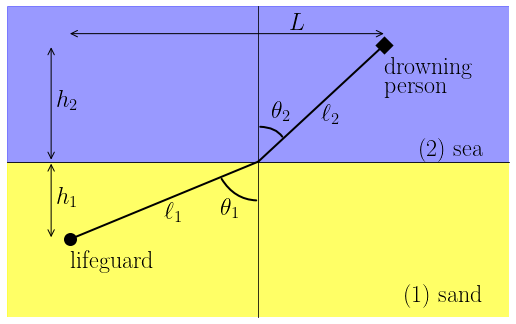

In [7]:
%matplotlib inline
fig.savefig("python_figures/bestpath.png", dpi=300)
fig